In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import pickle
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

np.set_printoptions(linewidth=np.inf, suppress=True, precision=2)

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import tensorflow as tf

from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel)
from sklearn.gaussian_process import GaussianProcessRegressor  
from sklearn.svm import SVR

import mitosheet

In [3]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

pyo.init_notebook_mode(connected=True)

### Unstructured Variance, n_input = 12, n_output = 1

In [4]:
df = pd.read_excel("Data/US12I1O.xlsx", index_col = 0)
df

,Input 01,Input 02,Input 03,Input 04,Input 05,Input 06,Input 07,Input 08,Input 09,Input 10,Input 11,Input 12,Output 01
DMU 0001,288.81,493.46,202.31,356.18,384.45,653.77,129.40,100.28,38.45,306.59,92.41,250.91,250.77
DMU 0002,349.98,420.00,139.32,312.89,543.04,504.54,120.43,177.65,86.96,330.87,79.16,201.81,372.71
DMU 0003,280.78,452.42,127.85,315.42,559.22,466.35,166.57,165.57,81.43,359.75,83.23,246.78,293.40
DMU 0004,405.33,376.32,237.28,451.43,414.19,318.03,187.77,154.65,49.71,316.82,97.74,344.70,462.69
DMU 0005,348.96,426.79,170.01,292.91,502.76,342.94,146.53,165.78,63.80,329.79,76.17,355.61,374.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,206.54,333.40,274.01,424.09,465.99,548.04,143.02,58.25,49.65,355.16,85.54,238.49,279.23
DMU 0997,328.82,415.09,121.60,268.46,494.32,454.22,150.96,143.44,65.04,374.88,69.81,261.57,344.45
DMU 0998,310.52,565.44,126.06,320.91,463.01,390.07,151.81,202.55,101.67,333.12,87.52,328.13,320.62
DMU 0999,390.34,255.88,209.15,269.76,576.57,261.14,162.39,102.92,66.70,401.16,72.50,318.26,380.24


In [5]:
df_sol = pd.read_excel("US12I1O_gradientboostingregressor_Solution_4.xlsx", index_col=0)
df_sol

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Output 01
DMU 0001,0.424925,0.001229,0.000000,0.000251,0.000315,0.000315,0.000315,0.000315,0.000000,0.000315,0.000000,0.000251,0.000315,0.001694
DMU 0002,0.614461,0.001057,0.000000,0.000317,0.000317,0.000317,0.000317,0.000317,0.000000,0.000317,0.000000,0.000317,0.000317,0.001649
DMU 0003,0.517561,0.001310,0.000000,0.000267,0.000356,0.000267,0.000389,0.000267,0.000000,0.000267,0.000000,0.000267,0.000267,0.001764
DMU 0004,0.734761,0.001506,0.000000,0.000000,0.000000,0.000000,0.001225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001588
DMU 0005,0.636671,0.001473,0.000000,0.000174,0.000183,0.000174,0.000596,0.000174,0.000000,0.000174,0.000000,0.000174,0.000174,0.001702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.517400,0.001595,0.000133,0.000133,0.000133,0.000133,0.000633,0.000133,0.000133,0.000133,0.000133,0.000133,0.000133,0.001853
DMU 0997,0.600758,0.001118,0.000000,0.000335,0.000335,0.000335,0.000335,0.000335,0.000000,0.000335,0.000000,0.000335,0.000335,0.001744
DMU 0998,0.564403,0.001521,0.000000,0.000182,0.000182,0.000182,0.000617,0.000182,0.000000,0.000182,0.000000,0.000182,0.000182,0.001760
DMU 0999,0.668289,0.001535,0.000000,0.000000,0.000000,0.000000,0.001535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001758


In [6]:
mitosheet.sheet(df_sol, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-f0ca296f-e83f-47bb-8f0b-0805780617be", "code": {"imports…

In [7]:
print((df_sol==0).sum())
print("Total : ", (df_sol==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01        0
Weight_Input 02      819
Weight_Input 03      187
Weight_Input 04       90
Weight_Input 05      157
Weight_Input 06        1
Weight_Input 07      162
Weight_Input 08      439
Weight_Input 09      148
Weight_Input 10      347
Weight_Input 11      169
Weight_Input 12      142
Weight_Output 01       0
dtype: int64
Total :  2661


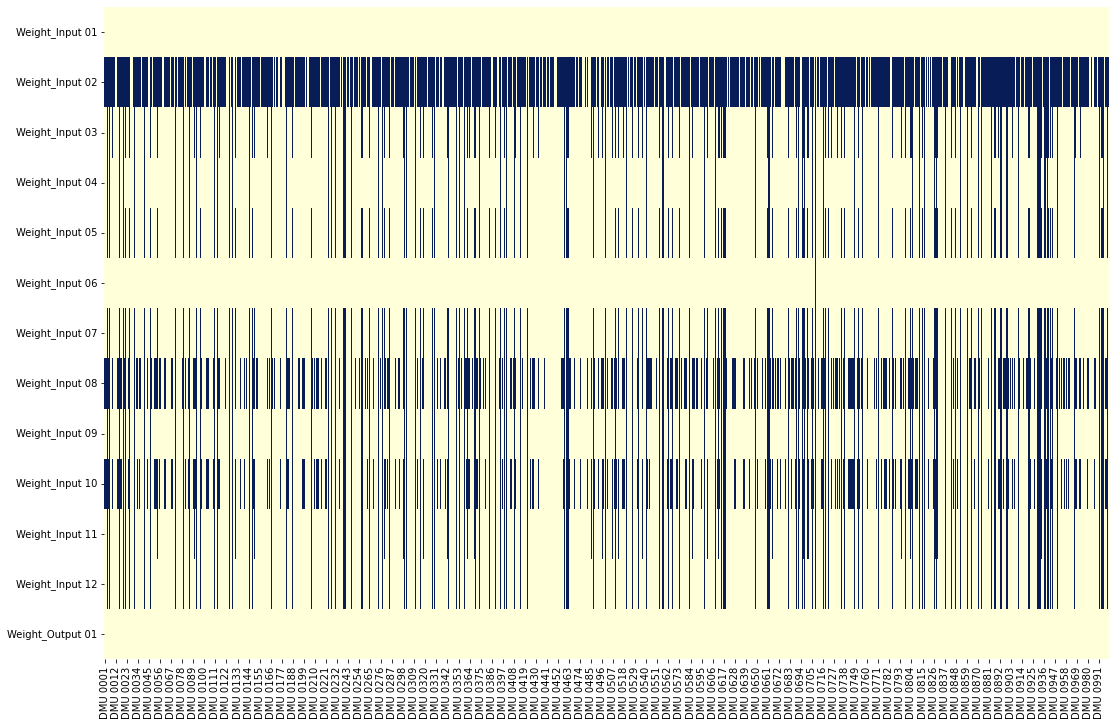

In [8]:
plt.figure(figsize=(18,12))
sns.heatmap(df_sol.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

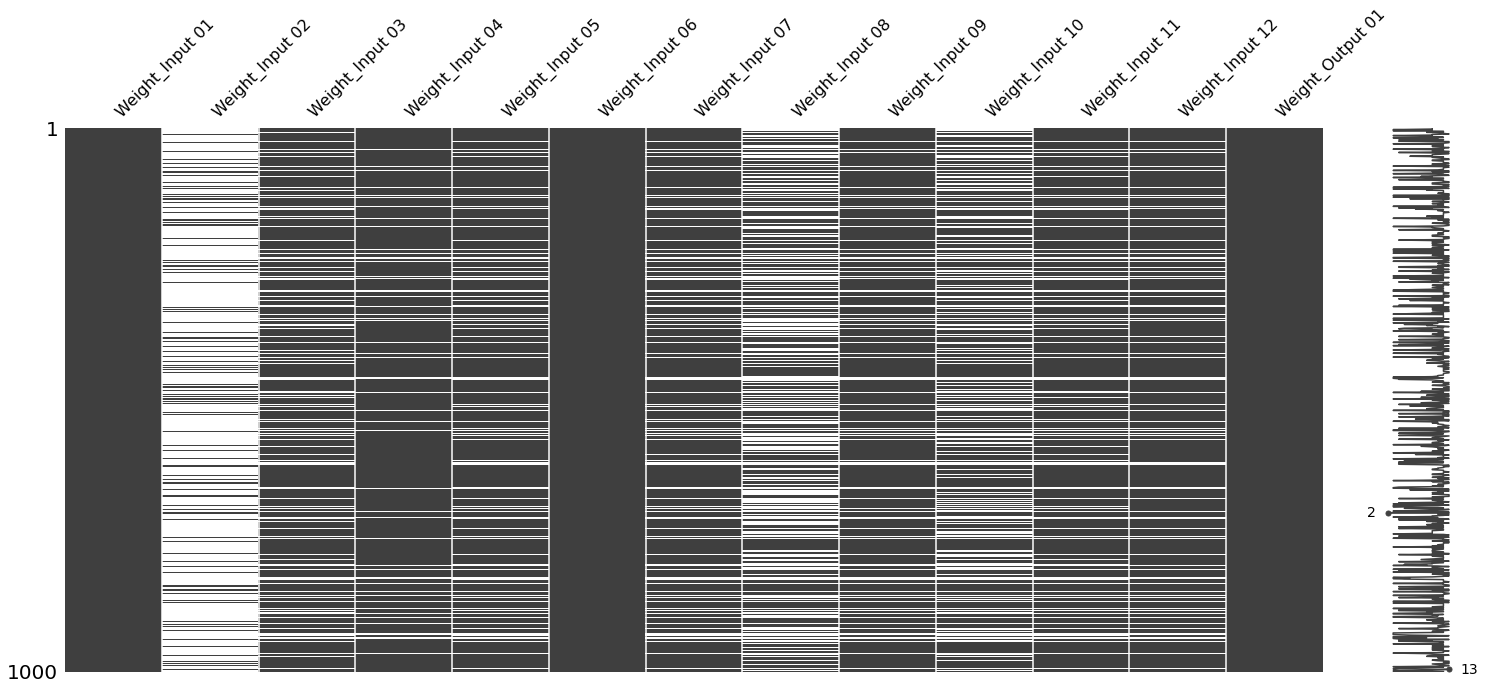

In [9]:
msno.matrix(df_sol.iloc[:,1:].replace(0, np.nan));

In [10]:
df_sol.iloc[:,1:].replace(0, np.nan).isna().sum(axis=1).describe()

count    1000.000000
mean        2.661000
std         3.133352
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        11.000000
dtype: float64

### DecisionTreeRegressor

In [12]:
df_dt = pd.read_excel("US12I1O_decisiontreeregressor_Solution_5.xlsx", index_col=0)
df_dt

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Output 01
DMU 0001,0.410746,0.001405,0.000220,0.000220,0.000220,0.000220,0.000220,0.000220,0.000220,0.000220,0.000000,0.000220,0.000220,0.001638
DMU 0002,0.588830,0.001372,0.000026,0.000026,0.000286,0.000026,0.000511,0.000286,0.000026,0.000286,0.000000,0.000286,0.000286,0.001580
DMU 0003,0.513297,0.001608,0.000025,0.000025,0.000528,0.000017,0.000528,0.000025,0.000025,0.000177,0.000004,0.000528,0.000177,0.001749
DMU 0004,0.734761,0.001506,0.000000,0.000000,0.000000,0.000000,0.001225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001588
DMU 0005,0.639435,0.001616,0.000000,0.000000,0.000515,0.000000,0.000622,0.000000,0.000000,0.000515,0.000000,0.000515,0.000000,0.001709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.532035,0.002015,0.000271,0.000271,0.000271,0.000000,0.000271,0.000271,0.000271,0.000271,0.000000,0.000271,0.000271,0.001905
DMU 0997,0.583647,0.001452,0.000114,0.000114,0.000421,0.000114,0.000421,0.000114,0.000114,0.000126,0.000000,0.000421,0.000114,0.001694
DMU 0998,0.549386,0.001571,0.000031,0.000031,0.000553,0.000031,0.000553,0.000031,0.000031,0.000031,0.000031,0.000553,0.000031,0.001714
DMU 0999,0.668289,0.001535,0.000000,0.000000,0.000000,0.000000,0.001535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001758


In [13]:
print((df_dt==0).sum())
print("Total : ", (df_dt==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01        0
Weight_Input 02      236
Weight_Input 03      287
Weight_Input 04       96
Weight_Input 05      364
Weight_Input 06        1
Weight_Input 07      199
Weight_Input 08      244
Weight_Input 09      148
Weight_Input 10      522
Weight_Input 11      124
Weight_Input 12      190
Weight_Output 01       0
dtype: int64
Total :  2411


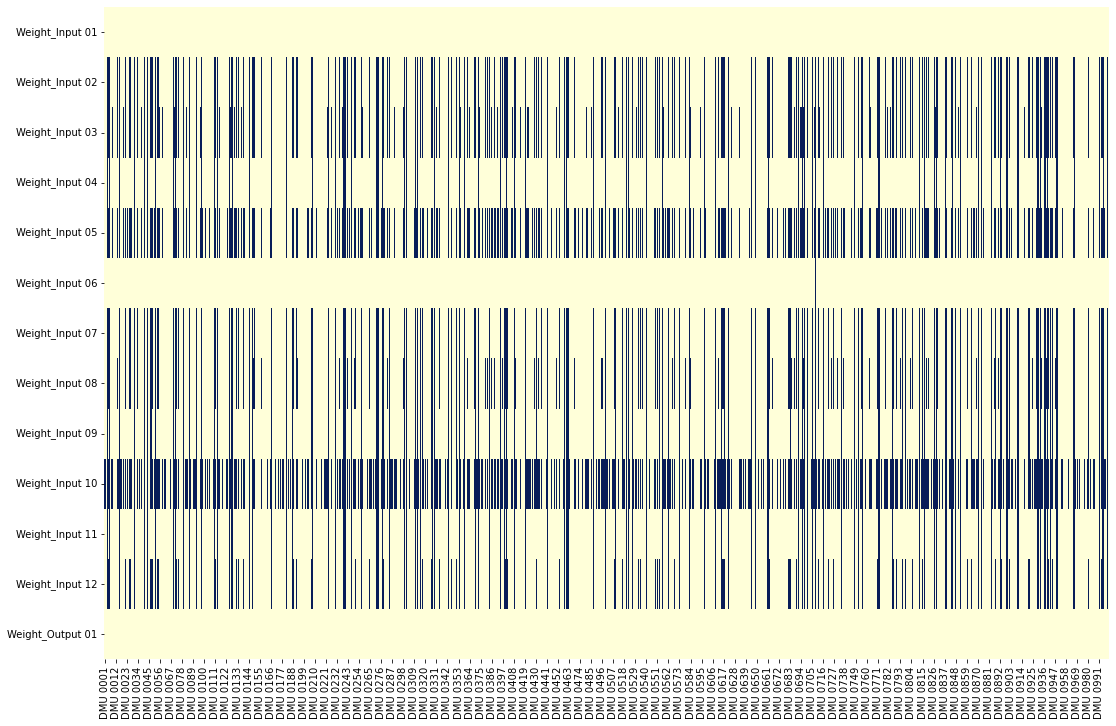

In [14]:
plt.figure(figsize=(18,12))
sns.heatmap(df_dt.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [15]:
res_dt = pd.DataFrame()
res_dt["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_dt["Efficiency_Scores_DT"] = df_dt["Efficiency_Scores"]
res_dt["Diff"] = res_dt["Efficiency_Scores_Basic"]  - res_dt["Efficiency_Scores_DT"]
res_dt["Diff_Perc"] = (res_dt["Diff"] / res_dt["Efficiency_Scores_Basic"]) * 100 
res_dt["Diff_Perc < 10"] = np.abs(res_dt["Diff_Perc"]) < 10  
res_dt = res_dt.round(4)
res_dt


,Efficiency_Scores_Basic,Efficiency_Scores_DT,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.4249,0.4107,0.0142,3.3370,True
DMU 0002,0.6145,0.5888,0.0256,4.1713,True
DMU 0003,0.5176,0.5133,0.0043,0.8239,True
DMU 0004,0.7348,0.7348,0.0000,0.0000,True
DMU 0005,0.6367,0.6394,-0.0028,-0.4341,True
...,...,...,...,...,...
DMU 0996,0.5174,0.5320,-0.0146,-2.8287,True
DMU 0997,0.6008,0.5836,0.0171,2.8483,True
DMU 0998,0.5644,0.5494,0.0150,2.6608,True
DMU 0999,0.6683,0.6683,0.0000,0.0000,True


In [16]:
mitosheet.sheet(res_dt, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-e88d8fa9-6e06-45d3-8118-73634bb2a0b8", "code": {"imports…

In [17]:
blue = res_dt["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_dt["Diff_Perc < 10"]) - (res_dt["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  1000
red :  0


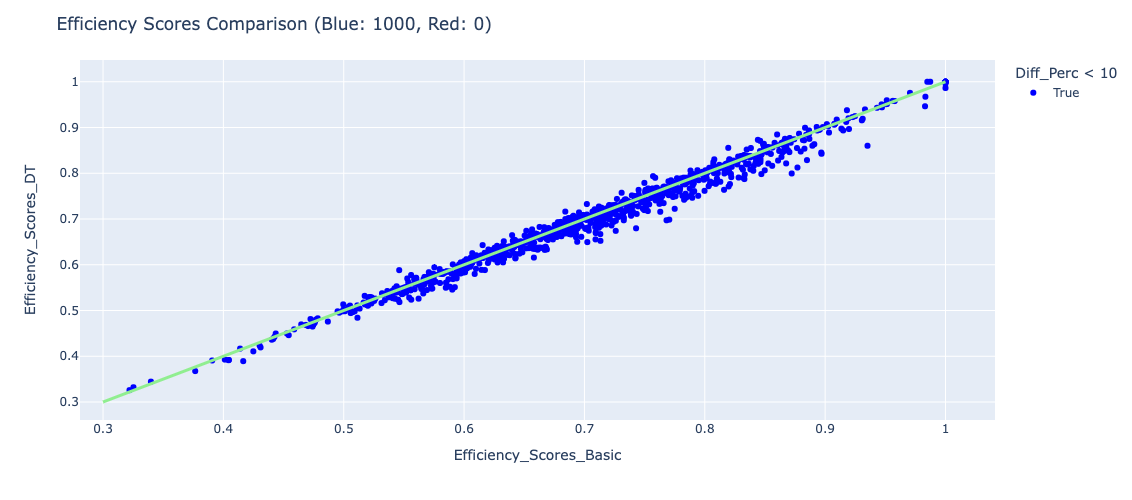

In [18]:
fig = px.scatter(res_dt, x="Efficiency_Scores_Basic", y="Efficiency_Scores_DT", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_DT", "Diff_Perc"] + [res_dt.index])


fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### RandomForestRegressor

In [19]:
df_rf = pd.read_excel("US12I1O_randomforestregressor_Solution_5.xlsx", index_col=0)
df_rf

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Output 01
DMU 0001,0.425163,0.001107,0.000000,0.000316,0.000340,0.000340,0.000340,0.000340,0.000000,0.000340,0.000000,0.000000,0.000340,0.001695
DMU 0002,0.614500,0.001069,0.000000,0.000309,0.000318,0.000309,0.000318,0.000318,0.000000,0.000318,0.000000,0.000309,0.000318,0.001649
DMU 0003,0.517561,0.001310,0.000000,0.000267,0.000356,0.000267,0.000389,0.000267,0.000000,0.000267,0.000000,0.000267,0.000267,0.001764
DMU 0004,0.734761,0.001506,0.000000,0.000000,0.000000,0.000000,0.001225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001588
DMU 0005,0.640417,0.001540,0.000000,0.000000,0.000473,0.000000,0.000655,0.000473,0.000000,0.000473,0.000000,0.000000,0.000000,0.001712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.517400,0.001595,0.000133,0.000133,0.000133,0.000133,0.000633,0.000133,0.000133,0.000133,0.000133,0.000133,0.000133,0.001853
DMU 0997,0.600758,0.001118,0.000000,0.000335,0.000335,0.000335,0.000335,0.000335,0.000000,0.000335,0.000000,0.000335,0.000335,0.001744
DMU 0998,0.564665,0.001530,0.000000,0.000188,0.000188,0.000188,0.000626,0.000188,0.000000,0.000188,0.000000,0.000000,0.000188,0.001761
DMU 0999,0.668289,0.001535,0.000000,0.000000,0.000000,0.000000,0.001535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001758


In [20]:
print((df_rf==0).sum())
print("Total : ", (df_rf==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01        0
Weight_Input 02      847
Weight_Input 03      240
Weight_Input 04       84
Weight_Input 05      223
Weight_Input 06        1
Weight_Input 07      123
Weight_Input 08      513
Weight_Input 09      112
Weight_Input 10      396
Weight_Input 11      263
Weight_Input 12      205
Weight_Output 01       0
dtype: int64
Total :  3007


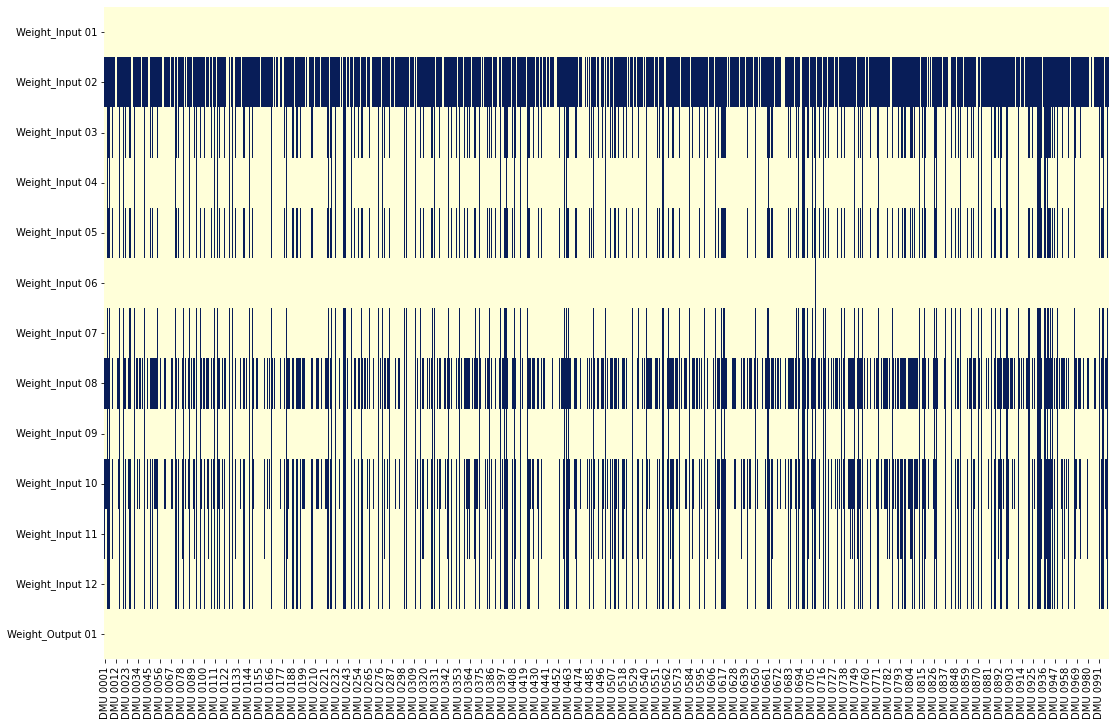

In [21]:
plt.figure(figsize=(18,12))
sns.heatmap(df_rf.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [22]:
res_rf = pd.DataFrame()
res_rf["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_rf["Efficiency_Scores_RF"] = df_rf["Efficiency_Scores"]
res_rf["Diff"] = res_rf["Efficiency_Scores_Basic"]  - res_rf["Efficiency_Scores_RF"]
res_rf["Diff_Perc"] = (res_rf["Diff"] / res_rf["Efficiency_Scores_Basic"]) * 100 
res_rf["Diff_Perc < 10"] = np.abs(res_rf["Diff_Perc"]) < 10  
res_rf = res_rf.round(4)
res_rf


,Efficiency_Scores_Basic,Efficiency_Scores_RF,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.4249,0.4252,-0.0002,-0.0560,True
DMU 0002,0.6145,0.6145,-0.0000,-0.0063,True
DMU 0003,0.5176,0.5176,0.0000,0.0000,True
DMU 0004,0.7348,0.7348,0.0000,0.0000,True
DMU 0005,0.6367,0.6404,-0.0037,-0.5884,True
...,...,...,...,...,...
DMU 0996,0.5174,0.5174,0.0000,0.0000,True
DMU 0997,0.6008,0.6008,0.0000,0.0000,True
DMU 0998,0.5644,0.5647,-0.0003,-0.0464,True
DMU 0999,0.6683,0.6683,0.0000,0.0000,True


In [23]:
mitosheet.sheet(res_rf, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-de553c8e-16cd-42fb-9c60-c21b8c1fa2a3", "code": {"imports…

In [24]:
blue = res_rf["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_rf["Diff_Perc < 10"]) - (res_rf["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  1000
red :  0


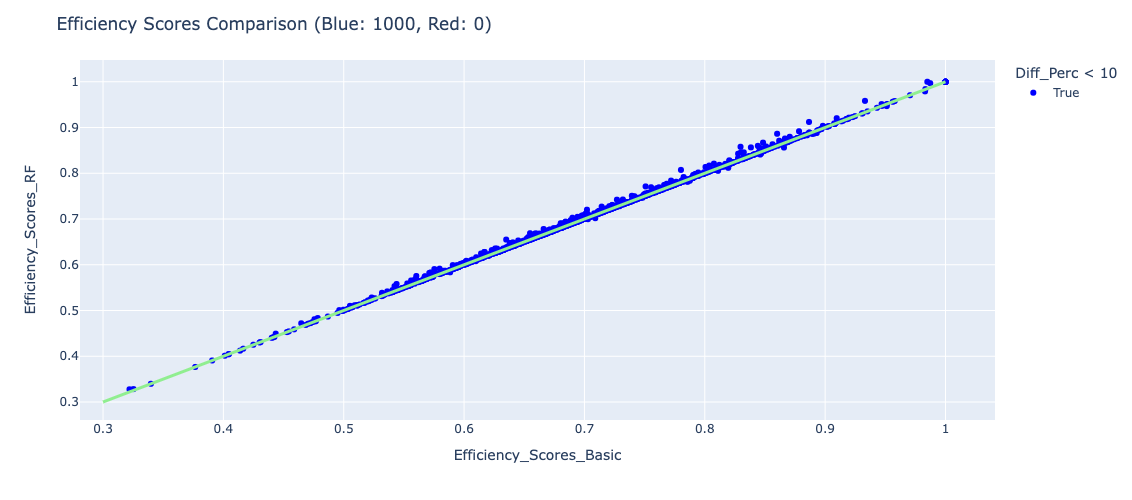

In [25]:
fig = px.scatter(res_rf, x="Efficiency_Scores_Basic", y="Efficiency_Scores_RF", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_RF", "Diff_Perc"] + [res_rf.index])


fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### GradientBoostingRegressor

In [26]:
df_gb = pd.read_excel("US12I1O_gradientboostingregressor_Solution_5.xlsx", index_col=0)
df_gb

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Output 01
DMU 0001,0.423148,0.001059,0.000000,0.000276,0.000276,0.000276,0.000276,0.000276,0.000276,0.000276,0.000276,0.000276,0.000276,0.001687
DMU 0002,0.604989,0.000887,0.000000,0.000264,0.000339,0.000264,0.000339,0.000264,0.000000,0.000264,0.000264,0.000264,0.000339,0.001623
DMU 0003,0.513725,0.001571,0.000000,0.000062,0.000520,0.000062,0.000542,0.000062,0.000000,0.000062,0.000062,0.000062,0.000231,0.001751
DMU 0004,0.734761,0.001506,0.000000,0.000000,0.000000,0.000000,0.001225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001588
DMU 0005,0.636260,0.001498,0.000000,0.000102,0.000376,0.000102,0.000580,0.000102,0.000000,0.000102,0.000102,0.000102,0.000102,0.001700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.517400,0.001595,0.000133,0.000133,0.000133,0.000133,0.000633,0.000133,0.000133,0.000133,0.000133,0.000133,0.000133,0.001853
DMU 0997,0.585239,0.001131,0.000000,0.000227,0.000382,0.000227,0.000382,0.000227,0.000020,0.000227,0.000227,0.000227,0.000227,0.001699
DMU 0998,0.561125,0.001427,0.000000,0.000167,0.000167,0.000167,0.000607,0.000167,0.000000,0.000167,0.000167,0.000167,0.000167,0.001750
DMU 0999,0.668289,0.001535,0.000000,0.000000,0.000000,0.000000,0.001535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001758


In [27]:
print((df_gb==0).sum())
print("Total : ", (df_gb==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01        0
Weight_Input 02      799
Weight_Input 03      201
Weight_Input 04       91
Weight_Input 05      161
Weight_Input 06        1
Weight_Input 07      182
Weight_Input 08      334
Weight_Input 09      151
Weight_Input 10      172
Weight_Input 11      182
Weight_Input 12      143
Weight_Output 01       0
dtype: int64
Total :  2417


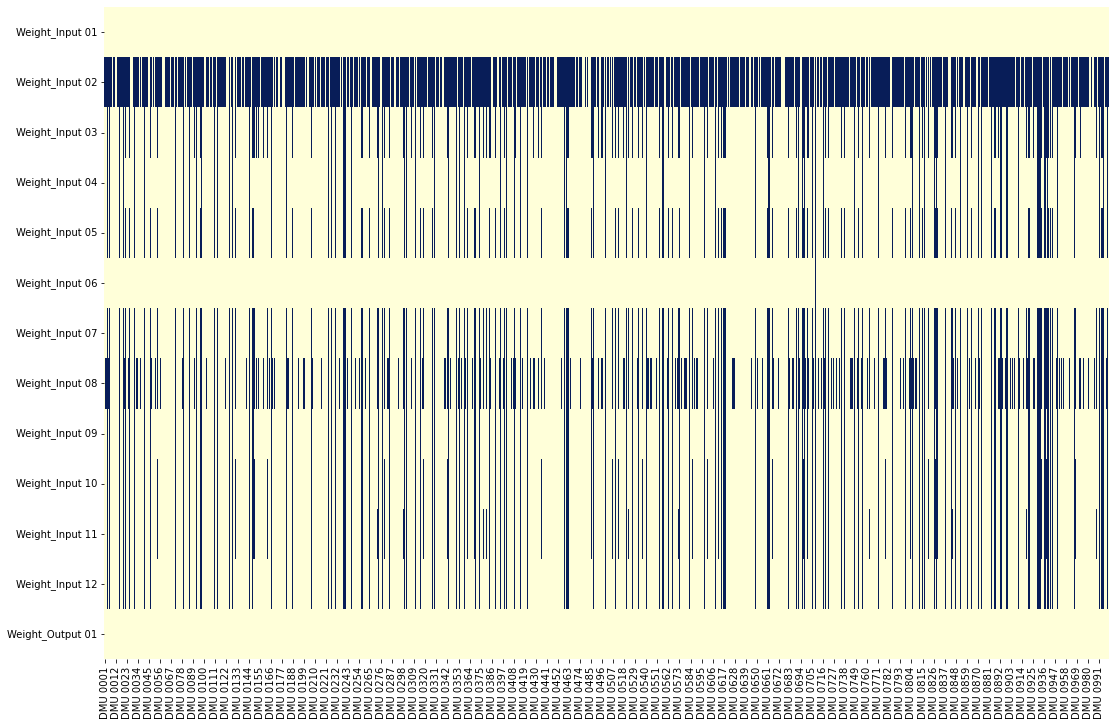

In [28]:
plt.figure(figsize=(18,12))
sns.heatmap(df_gb.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [29]:
res_gb = pd.DataFrame()
res_gb["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_gb["Efficiency_Scores_GB"] = df_gb["Efficiency_Scores"]
res_gb["Diff"] = res_gb["Efficiency_Scores_Basic"]  - res_gb["Efficiency_Scores_GB"]
res_gb["Diff_Perc"] = (res_gb["Diff"] / res_gb["Efficiency_Scores_Basic"]) * 100 
res_gb["Diff_Perc < 10"] = np.abs(res_gb["Diff_Perc"]) < 10  
res_gb = res_gb.round(4)
res_gb


,Efficiency_Scores_Basic,Efficiency_Scores_GB,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.4249,0.4231,0.0018,0.4183,True
DMU 0002,0.6145,0.6050,0.0095,1.5415,True
DMU 0003,0.5176,0.5137,0.0038,0.7412,True
DMU 0004,0.7348,0.7348,0.0000,0.0000,True
DMU 0005,0.6367,0.6363,0.0004,0.0645,True
...,...,...,...,...,...
DMU 0996,0.5174,0.5174,0.0000,0.0000,True
DMU 0997,0.6008,0.5852,0.0155,2.5834,True
DMU 0998,0.5644,0.5611,0.0033,0.5808,True
DMU 0999,0.6683,0.6683,0.0000,0.0000,True


In [30]:
mitosheet.sheet(res_gb, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-59e0f859-da05-4f06-84c2-56f45243ec45", "code": {"imports…

In [31]:
blue = res_gb["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_gb["Diff_Perc < 10"]) - (res_gb["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  1000
red :  0


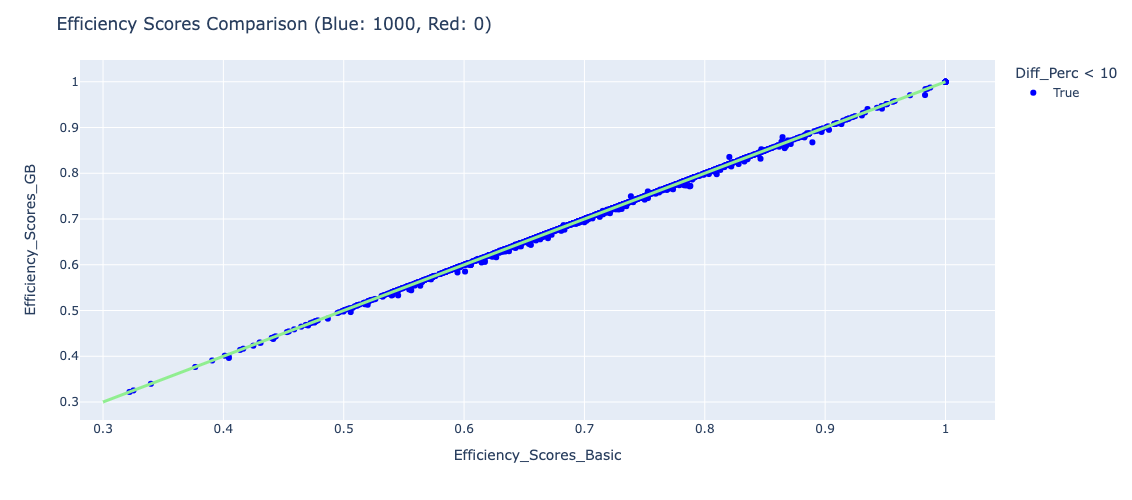

In [32]:
fig = px.scatter(res_gb, x="Efficiency_Scores_Basic", y="Efficiency_Scores_GB", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_GB", "Diff_Perc"] + [res_gb.index])


fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### XGBRegressor

In [33]:
df_xgb = pd.read_excel("US12I1O_xgbregressor_Solution_5.xlsx", index_col=0)
df_xgb

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Output 01
DMU 0001,0.410586,0.001473,0.000000,0.000270,0.000270,0.000000,0.000270,0.000270,0.000270,0.000270,0.000270,0.000270,0.000270,0.001637
DMU 0002,0.600198,0.000725,0.000000,0.000382,0.000382,0.000000,0.000382,0.000382,0.000382,0.000382,0.000382,0.000382,0.000382,0.001610
DMU 0003,0.515583,0.001424,0.000000,0.000221,0.000221,0.000000,0.000539,0.000221,0.000221,0.000313,0.000221,0.000221,0.000221,0.001757
DMU 0004,0.750043,0.001268,0.000000,0.000000,0.000000,0.000000,0.000856,0.000000,0.000363,0.000856,0.000363,0.000000,0.000000,0.001621
DMU 0005,0.633677,0.001616,0.000000,0.000000,0.000000,0.000000,0.001072,0.000000,0.000000,0.001072,0.000000,0.000000,0.000000,0.001694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.548106,0.002017,0.000063,0.000063,0.000063,0.000063,0.000665,0.000063,0.000665,0.000665,0.000063,0.000063,0.000063,0.001963
DMU 0997,0.581830,0.001369,0.000000,0.000212,0.000212,0.000000,0.000518,0.000212,0.000212,0.000301,0.000212,0.000212,0.000212,0.001689
DMU 0998,0.550085,0.001388,0.000000,0.000217,0.000217,0.000000,0.000539,0.000217,0.000217,0.000217,0.000217,0.000217,0.000217,0.001716
DMU 0999,0.676987,0.001324,0.000000,0.000000,0.000000,0.000000,0.001324,0.000000,0.000808,0.000808,0.000000,0.000000,0.000000,0.001780


In [34]:
print((df_xgb==0).sum())
print("Total : ", (df_xgb==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01        0
Weight_Input 02      700
Weight_Input 03      268
Weight_Input 04      225
Weight_Input 05      828
Weight_Input 06        1
Weight_Input 07      176
Weight_Input 08       51
Weight_Input 09       36
Weight_Input 10      126
Weight_Input 11      384
Weight_Input 12      154
Weight_Output 01       0
dtype: int64
Total :  2949


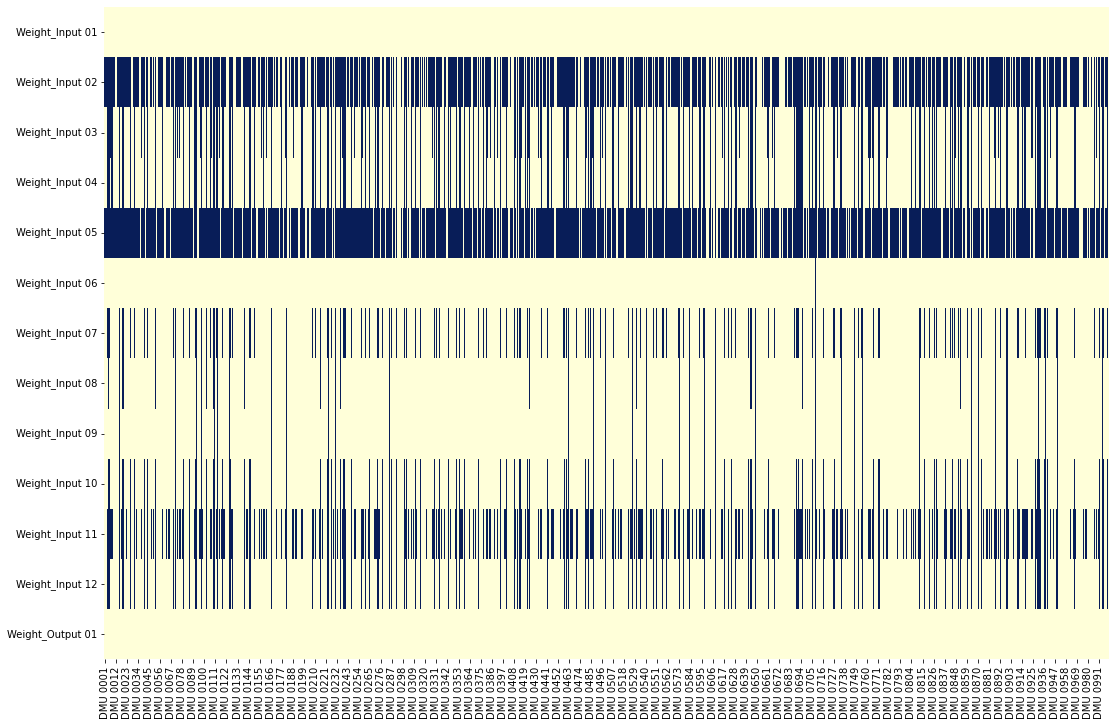

In [35]:
plt.figure(figsize=(18,12))
sns.heatmap(df_xgb.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [36]:
res_xgb = pd.DataFrame()
res_xgb["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_xgb["Efficiency_Scores_XGB"] = df_xgb["Efficiency_Scores"]
res_xgb["Diff"] = res_xgb["Efficiency_Scores_Basic"]  - res_xgb["Efficiency_Scores_XGB"]
res_xgb["Diff_Perc"] = (res_xgb["Diff"] / res_xgb["Efficiency_Scores_Basic"]) * 100 
res_xgb["Diff_Perc < 10"] = np.abs(res_xgb["Diff_Perc"]) < 10  
res_xgb = res_xgb.round(4)
res_xgb


,Efficiency_Scores_Basic,Efficiency_Scores_XGB,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.4249,0.4106,0.0143,3.3745,True
DMU 0002,0.6145,0.6002,0.0143,2.3212,True
DMU 0003,0.5176,0.5156,0.0020,0.3823,True
DMU 0004,0.7348,0.7500,-0.0153,-2.0798,True
DMU 0005,0.6367,0.6337,0.0030,0.4703,True
...,...,...,...,...,...
DMU 0996,0.5174,0.5481,-0.0307,-5.9346,True
DMU 0997,0.6008,0.5818,0.0189,3.1507,True
DMU 0998,0.5644,0.5501,0.0143,2.5369,True
DMU 0999,0.6683,0.6770,-0.0087,-1.3015,True


In [37]:
mitosheet.sheet(res_xgb, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-215679d5-4b26-4201-ba5e-f0e593b30cfa", "code": {"imports…

In [38]:
blue = res_xgb["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_xgb["Diff_Perc < 10"]) - (res_xgb["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  992
red :  8


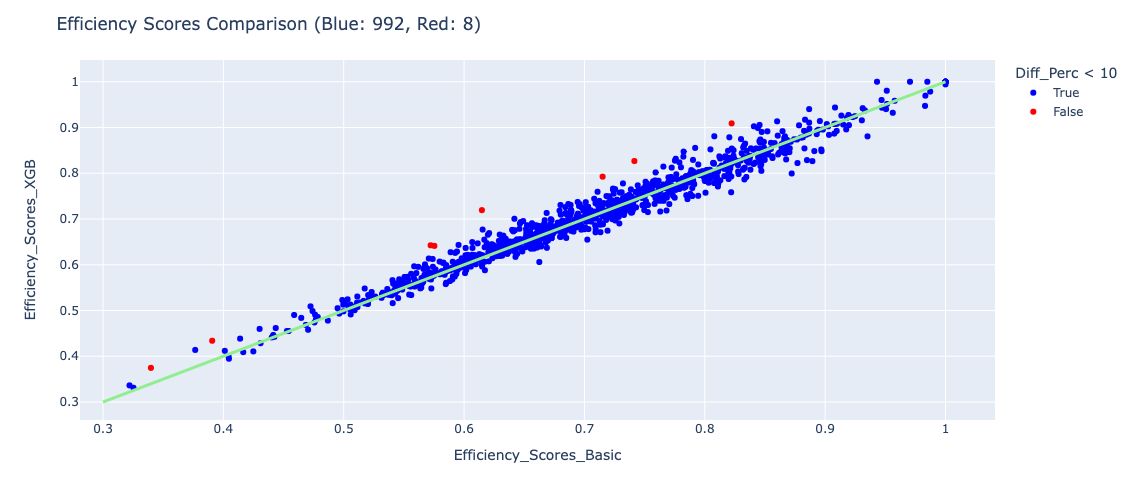

In [39]:
fig = px.scatter(res_xgb, x="Efficiency_Scores_Basic", y="Efficiency_Scores_XGB", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_XGB", "Diff_Perc"] + [res_xgb.index])


fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()